# GLM's

simple examples of each distribution

real example where we have to decide on the distribution based off of data

hw is another real example but different distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

## Poisson Regression

https://data.princeton.edu/wws509/datasets/#phd

In [2]:
phd = pd.read_csv('phd.csv')
phd.head()

,year,university,residence,events,exposure
0,1,1,1,31,7422
1,2,1,1,177,7166
2,3,1,1,393,6759
3,4,1,1,484,6138
4,5,1,1,500,5506


In [3]:
phd['university'] = phd['university'].astype(str)
phd['residence'] = phd['residence'].astype(str)

C:\Users\Chanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='events'>

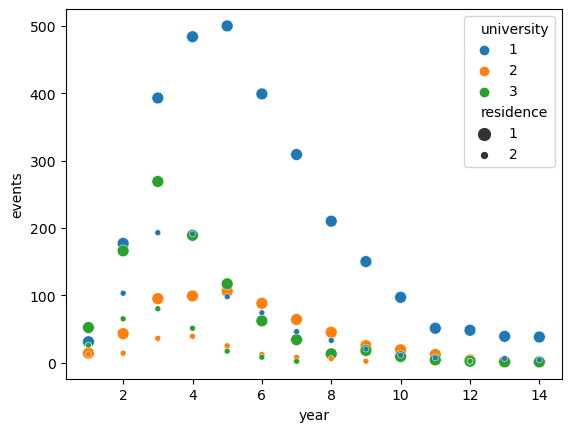

In [4]:
sns.scatterplot(phd['year'], phd['events'], hue=phd['university'], size = phd['residence'])

In [5]:
Xtrain = phd[['year', 'university', 'residence']]
ytrain = phd[['events']]
Xtrain = pd.get_dummies(data=Xtrain, drop_first=True)
Xtrain = sm.add_constant(Xtrain)

In [6]:
poisson_model = sm.GLM(ytrain, Xtrain, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 events   No. Observations:                   73
Model:                            GLM   Df Residuals:                       68
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.0
Date:                Mon, 08 Jul 2024   Deviance:                       2993.6
Time:                        17:07:54   Pearson chi2:                 2.65e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3270      0.026    239.076      0.000       6.275       6.379
year            -0.1590      0.004    -42.450      0.000      -0.166      -0.152
university_2    -1.5454      0.040    -39.053      0.000      -1.623      -1.468
university_3    -1.0962      0.033    -32.874      0.000      -1.162      -1.031
residence_2     -1.2318      0.032    -38.054      0.000      -1.295      -1.168
================================================================================
"""

## Gamma Regression

In [7]:
print(sm.datasets.scotland.DESCRLONG)
print(sm.datasets.scotland.NOTE)


This data is based on the example in Gill and describes the proportion of
voters who voted Yes to grant the Scottish Parliament taxation powers.
The data are divided into 32 council districts.  This example's explanatory
variables include the amount of council tax collected in pounds sterling as
of April 1997 per two adults before adjustments, the female percentage of
total claims for unemployment benefits as of January, 1998, the standardized
mortality rate (UK is 100), the percentage of labor force participation,
regional GDP, the percentage of children aged 5 to 15, and an interaction term
between female unemployment and the council tax.

The original source files and variable information are included in
/scotland/src/

::

    Number of Observations - 32 (1 for each Scottish district)

    Number of Variables - 8

    Variable name definitions::

        YES    - Proportion voting yes to granting taxation powers to the
                 Scottish parliament.
        COUTAX - Amount 

In [8]:
scotland = sm.datasets.scotland.load_pandas()

In [9]:
scotland = scotland.data
scotland.head()

,YES,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
0,60.3,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,52.3,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
2,53.4,679.0,28.3,113.0,86.3,9611.0,13.9,19215.7
3,57.0,801.0,27.1,109.0,80.4,9483.0,13.6,21707.1
4,68.7,753.0,22.0,115.0,64.7,9265.0,14.6,16566.0


C:\Users\Chanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UNEMPF', ylabel='YES'>

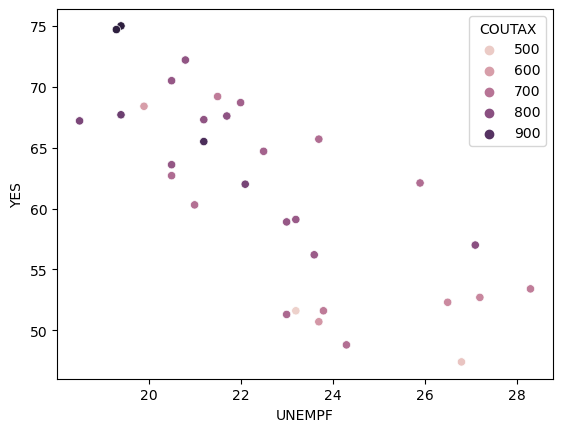

In [10]:
sns.scatterplot(scotland['UNEMPF'],scotland['YES'],hue=scotland['COUTAX'])

In [11]:
Xtrain = scotland[['COUTAX', 'UNEMPF', 'MOR', 'ACT', 'GDP', 'AGE', 'COUTAX_FEMALEUNEMP']]
ytrain = scotland[['YES']]
Xtrain = sm.add_constant(Xtrain)

In [12]:
gamma_model = sm.GLM(ytrain, Xtrain, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
gamma_results.summary()

C:\Users\Chanc\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Mon, 08 Jul 2024   Deviance:                     0.087389
Time:                        17:07:54   Pearson chi2:                   0.0860
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9800
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0178      0.011     -1.548      0.122      -0.040       0.005
COUTAX              4.962e-05   1.62e-05      3.060      0.002    1.78e-05    8.14e-05
UNEMPF                 0.0020      0.001      3.824      0.000       0.001       0.003
MOR                -7.181e-05   2.71e-05     -2.648      0.008      -0.000   -1.87e-05
ACT                    0.0001   4.06e-05      2.757      0.006    3.23e-05       0.000
GDP                -1.468e-07   1.24e-07     -1.187      0.235   -3.89e-07    9.56e-08
AGE                   -0.0005      0.000     -2.159      0.031      -0.001   -4.78e-05
COUTAX_FEMALEUNEMP -2.427e-06   7.46e-07     -3.253      0.001   -3.89e-06   -9.65e-07
======================================================================================
"""

## Binomial Regression

In [13]:
print(sm.datasets.star98.DESCRLONG)
print(sm.datasets.star98.NOTE)


This data is on the California education policy and outcomes (STAR program
results for 1998.  The data measured standardized testing by the California
Department of Education that required evaluation of 2nd - 11th grade students
by the the Stanford 9 test on a variety of subjects.  This dataset is at
the level of the unified school district and consists of 303 cases.  The
binary response variable represents the number of 9th graders scoring
over the national median value on the mathematics exam.

The data used in this example is only a subset of the original source.

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income stu

In [14]:
star98 = sm.datasets.star98.load_pandas()
star98 = star98.data
star98.head()

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


In [15]:
star98.columns

Index(['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
       'PERMINTE', 'AVYRSEXP', 'AVSALK', 'PERSPENK', 'PTRATIO', 'PCTAF',
       'PCTCHRT', 'PCTYRRND', 'PERMINTE_AVYRSEXP', 'PERMINTE_AVSAL',
       'AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO', 'PERSPEN_PCTAF', 'PTRATIO_PCTAF',
       'PERMINTE_AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO_PCTAF'],
      dtype='object')

In [16]:
Xtrain = star98[['LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
       'PERMINTE', 'AVYRSEXP', 'AVSALK', 'PERSPENK', 'PTRATIO', 'PCTAF',
       'PCTCHRT', 'PCTYRRND', 'PERMINTE_AVYRSEXP', 'PERMINTE_AVSAL',
       'AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO', 'PERSPEN_PCTAF', 'PTRATIO_PCTAF',
       'PERMINTE_AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO_PCTAF']]
ytrain = star98[['NABOVE', 'NBELOW']]
Xtrain = sm.add_constant(Xtrain)

In [17]:
binomial_model = sm.GLM(ytrain, Xtrain, family=sm.families.Binomial())
binomial_results = binomial_model.fit()
binomial_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     ['NABOVE', 'NBELOW']   No. Observations:                  303
Model:                              GLM   Df Residuals:                      282
Model Family:                  Binomial   Df Model:                           20
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -2998.6
Date:                  Mon, 08 Jul 2024   Deviance:                       4078.8
Time:                          17:07:55   Pearson chi2:                 4.05e+03
No. Iterations:                       5   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.9589      1.547      1.913      0.056      -0.073       5.990
LOWINC                     -0.0168      0.000    -38.749      0.000      -0.018      -0.016
PERASIAN                    0.0099      0.001     16.505      0.000       0.009       0.011
PERBLACK                   -0.0187      0.001    -25.182      0.000      -0.020      -0.017
PERHISP                    -0.0142      0.000    -32.818      0.000      -0.015      -0.013
PERMINTE                    0.2545      0.030      8.498      0.000       0.196       0.313
AVYRSEXP                    0.2407      0.057      4.212      0.000       0.129       0.353
AVSALK                      0.0804      0.014      5.775      0.000       0.053       0.108
PERSPENK                   -1.9522      0.317     -6.162      0.000      -2.573      -1.331
PTRATIO                    -0.3341      0.061     -5.453      0.000      -0.454      -0.214
PCTAF                      -0.1690      0.033     -5.169      0.000      -0.233      -0.105
PCTCHRT                     0.0049      0.001      3.921      0.000       0.002       0.007
PCTYRRND                   -0.0036      0.000    -15.878      0.000      -0.004      -0.003
PERMINTE_AVYRSEXP          -0.0141      0.002     -7.391      0.000      -0.018      -0.010
PERMINTE_AVSAL             -0.0040      0.000     -8.450      0.000      -0.005      -0.003
AVYRSEXP_AVSAL             -0.0039      0.001     -4.059      0.000      -0.006      -0.002
PERSPEN_PTRATIO             0.0917      0.015      6.321      0.000       0.063       0.120
PERSPEN_PCTAF               0.0490      0.007      6.574      0.000       0.034       0.064
PTRATIO_PCTAF               0.0080      0.001      5.362      0.000       0.005       0.011
PERMINTE_AVYRSEXP_AVSAL     0.0002   2.99e-05      7.428      0.000       0.000       0.000
PERSPEN_PTRATIO_PCTAF      -0.0022      0.000     -6.445      0.000      -0.003      -0.002
===========================================================================================
"""

In [18]:
binomial_results.predict(Xtrain)

0      0.583312
1      0.751447
2      0.500583
3      0.685345
4      0.322510
         ...   
298    0.325920
299    0.396350
300    0.395827
301    0.410370
302    0.341749
Length: 303, dtype: float64

In [19]:
144/(144+40)

0.782608695652174

In [20]:
ytrain

,NABOVE,NBELOW
0,452.0,355.0
1,144.0,40.0
2,337.0,234.0
3,395.0,178.0
4,8.0,57.0
...,...,...
298,96.0,246.0
299,37.0,117.0
300,208.0,387.0
301,199.0,510.0


# Bird Counts
https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-cap&identifier=627

In [21]:
observation = pd.read_csv('641_bird_observations.csv')
observation.head()

,survey_id,reach,site_code,survey_date,time_start,time_end,observer,code,common_name,distance,bird_count,observation_notes,seen,heard,direction,qccomment
0,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,BLPH,Black Phoebe,40+,2.0,NaN,True,True,W,NaN
1,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,GTGR,Great-tailed Grackle,FT,1.0,Far,True,False,S,NaN
2,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,GTGR,Great-tailed Grackle,FT,2.0,NaN,True,False,NW,NaN
3,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,GTGR,Great-tailed Grackle,40+,2.0,NaN,True,False,NW,NaN
4,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,HOFI,House Finch,20-40,1.0,NaN,True,True,SW,NaN


In [22]:
reach = pd.read_csv('641_reach_characteristics.csv')
reach.head()

,site_code,reach,urbanized,restored,water
0,Ave35_dwn_B1,Ave35,Urban,NotRestored,Ephemeral
1,Ave35_dwn_B2,Ave35,Urban,NotRestored,Ephemeral
2,Ave35_mid_B1,Ave35,Urban,NotRestored,Ephemeral
3,Ave35_mid_B2,Ave35,Urban,NotRestored,Ephemeral
4,Ave35_up_B1,Ave35,Urban,NotRestored,Ephemeral


In [23]:
observation = observation.merge(reach, on='site_code')
observation.head()

,survey_id,reach_x,site_code,survey_date,time_start,time_end,observer,code,common_name,distance,bird_count,observation_notes,seen,heard,direction,qccomment,reach_y,urbanized,restored,water
0,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,BLPH,Black Phoebe,40+,2.0,NaN,True,True,W,NaN,Ave35,Urban,NotRestored,Ephemeral
1,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,GTGR,Great-tailed Grackle,FT,1.0,Far,True,False,S,NaN,Ave35,Urban,NotRestored,Ephemeral
2,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,GTGR,Great-tailed Grackle,FT,2.0,NaN,True,False,NW,NaN,Ave35,Urban,NotRestored,Ephemeral
3,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,GTGR,Great-tailed Grackle,40+,2.0,NaN,True,False,NW,NaN,Ave35,Urban,NotRestored,Ephemeral
4,6072,Ave35,Ave35_up_B2,2014-01-18,08:26:00,08:41:00,MeBa,HOFI,House Finch,20-40,1.0,NaN,True,True,SW,NaN,Ave35,Urban,NotRestored,Ephemeral


In [24]:
observation.columns

Index(['survey_id', 'reach_x', 'site_code', 'survey_date', 'time_start',
       'time_end', 'observer', 'code', 'common_name', 'distance', 'bird_count',
       'observation_notes', 'seen', 'heard', 'direction', 'qccomment',
       'reach_y', 'urbanized', 'restored', 'water'],
      dtype='object')

In [25]:
observation = observation[['survey_date', 'time_start','time_end',
                           'distance', 'bird_count','seen', 'heard', 
                           'direction','urbanized', 'restored', 'water']]

In [26]:
observation['month'] = observation['survey_date'].str.split('-', expand=True)[1]

In [27]:
observation['duration'] = (pd.to_datetime(observation['time_end']) - pd.to_datetime(observation['time_start'])).dt.total_seconds()

In [28]:
observation

,survey_date,time_start,time_end,distance,bird_count,seen,heard,direction,urbanized,restored,water,month,duration
0,2014-01-18,08:26:00,08:41:00,40+,2.0,True,True,W,Urban,NotRestored,Ephemeral,01,900.0
1,2014-01-18,08:26:00,08:41:00,FT,1.0,True,False,S,Urban,NotRestored,Ephemeral,01,900.0
2,2014-01-18,08:26:00,08:41:00,FT,2.0,True,False,NW,Urban,NotRestored,Ephemeral,01,900.0
3,2014-01-18,08:26:00,08:41:00,40+,2.0,True,False,NW,Urban,NotRestored,Ephemeral,01,900.0
4,2014-01-18,08:26:00,08:41:00,20-40,1.0,True,True,SW,Urban,NotRestored,Ephemeral,01,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22443,2019-06-11,06:53:00,07:08:00,40+,1.0,False,True,SE,Urban,Restored,Perennial,06,900.0
22444,2019-06-11,06:53:00,07:08:00,5-10,1.0,True,False,N,Urban,Restored,Perennial,06,900.0
22445,2019-06-11,06:53:00,07:08:00,40+,1.0,False,True,E,Urban,Restored,Perennial,06,900.0
22446,2019-06-11,06:53:00,07:08:00,20-40,1.0,False,True,S,Urban,Restored,Perennial,06,900.0


In [29]:
observation.drop(columns = ['survey_date','time_start','time_end'], inplace=True)
observation.head()

,distance,bird_count,seen,heard,direction,urbanized,restored,water,month,duration
0,40+,2.0,True,True,W,Urban,NotRestored,Ephemeral,01,900.0
1,FT,1.0,True,False,S,Urban,NotRestored,Ephemeral,01,900.0
2,FT,2.0,True,False,NW,Urban,NotRestored,Ephemeral,01,900.0
3,40+,2.0,True,False,NW,Urban,NotRestored,Ephemeral,01,900.0
4,20-40,1.0,True,True,SW,Urban,NotRestored,Ephemeral,01,900.0


In [30]:
observation = pd.get_dummies(data=observation, drop_first=True)
observation['seen'] = np.where(observation['seen'] == True, 1, 0)
observation['heard'] = np.where(observation['heard'] == True, 1, 0)
observation.head()

,bird_count,seen,heard,duration,distance_10-20,distance_20-40,distance_40+,distance_5-10,distance_FT,direction_N,...,direction_SW,direction_W,urbanized_Urban,restored_Restored,water_Perennial,month_02,month_04,month_05,month_06,month_10
0,2.0,1,1,900.0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1.0,1,0,900.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,1,0,900.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2.0,1,0,900.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,1,1,900.0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [31]:
print(observation.shape)
observation.dropna(inplace=True)
print(observation.shape)

(22448, 24)
(22446, 24)


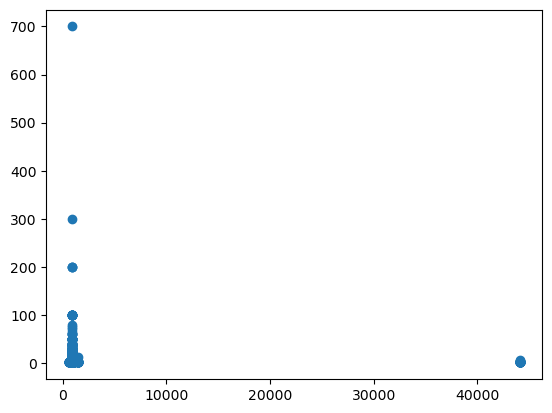

In [32]:
plt.scatter(observation['duration'],observation['bird_count'])

In [33]:
observation = observation[observation['duration'] < 10000]
observation.shape

(22401, 24)

In [34]:
observation = observation[observation['bird_count'] < 100]
observation.shape

(22384, 24)

In [35]:
test = observation.sample(frac=0.2, axis=0)
train = observation.drop(index=test.index)

C:\Users\Chanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration', ylabel='bird_count'>

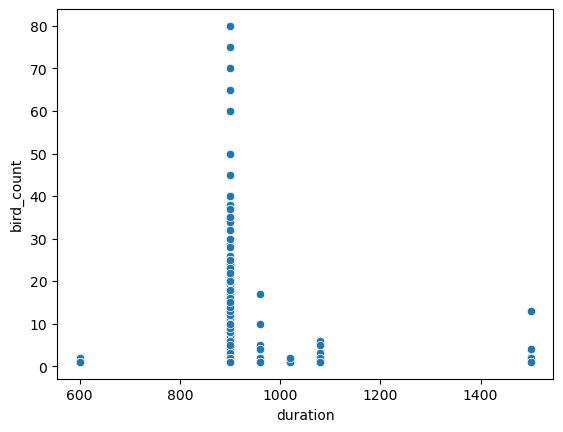

In [36]:
sns.scatterplot(observation['duration'], observation['bird_count'])

In [37]:
Xtrain = train.drop(columns=['bird_count'])
ytrain = train[['bird_count']]

Xtest = test.drop(columns=['bird_count'])
ytest = test[['bird_count']]

In [38]:
Xtrain = sm.add_constant(Xtrain)
Xtest = sm.add_constant(Xtest)

In [39]:
poisson_model = sm.GLM(ytrain, Xtrain, family=sm.families.Poisson())
poisson_results = poisson_model.fit()
poisson_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             bird_count   No. Observations:                17907
Model:                            GLM   Df Residuals:                    17883
Model Family:                 Poisson   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29665.
Date:                Mon, 08 Jul 2024   Deviance:                       20124.
Time:                        17:07:56   Pearson chi2:                 5.37e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2044
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6054      0.229     -2.640      0.008      -1.055      -0.156
seen                  0.6821      0.018     36.939      0.000       0.646       0.718
heard                 0.1768      0.017     10.194      0.000       0.143       0.211
duration              0.0004      0.000      1.959      0.050   -2.68e-07       0.001
distance_10-20        0.1355      0.123      1.105      0.269      -0.105       0.376
distance_20-40        0.3689      0.120      3.074      0.002       0.134       0.604
distance_40+          0.4846      0.120      4.051      0.000       0.250       0.719
distance_5-10         0.0172      0.134      0.128      0.898      -0.245       0.280
distance_FT           0.6972      0.119      5.844      0.000       0.463       0.931
direction_N          -0.0173      0.023     -0.738      0.460      -0.063       0.029
direction_NE          0.0385      0.026      1.475      0.140      -0.013       0.090
direction_NW         -0.0080      0.025     -0.317      0.751      -0.057       0.041
direction_S           0.0363      0.023      1.550      0.121      -0.010       0.082
direction_SE          0.0036      0.027      0.134      0.893      -0.049       0.056
direction_SW          0.0121      0.026      0.459      0.646      -0.039       0.064
direction_W          -0.0325      0.024     -1.355      0.175      -0.080       0.015
urbanized_Urban      -0.1733      0.020     -8.687      0.000      -0.212      -0.134
restored_Restored     0.0727      0.017      4.398      0.000       0.040       0.105
water_Perennial      -0.1062      0.016     -6.450      0.000      -0.139      -0.074
month_02             -0.0173      0.032     -0.534      0.593      -0.081       0.046
month_04             -0.1922      0.018    -10.709      0.000      -0.227      -0.157
month_05             -0.3714      0.041     -9.127      0.000      -0.451      -0.292
month_06             -0.1811      0.018    -10.199      0.000      -0.216      -0.146
month_10              0.0290      0.019      1.509      0.131      -0.009       0.067
=====================================================================================
"""

Text(0, 0.5, 'Fitted')

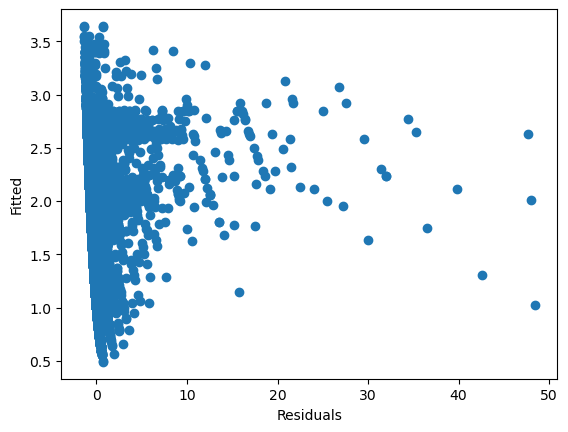

In [40]:
plt.scatter(poisson_results.resid_pearson,poisson_results.mu)
#plt.xlim(0,150)
plt.xlabel('Residuals')
plt.ylabel('Fitted')

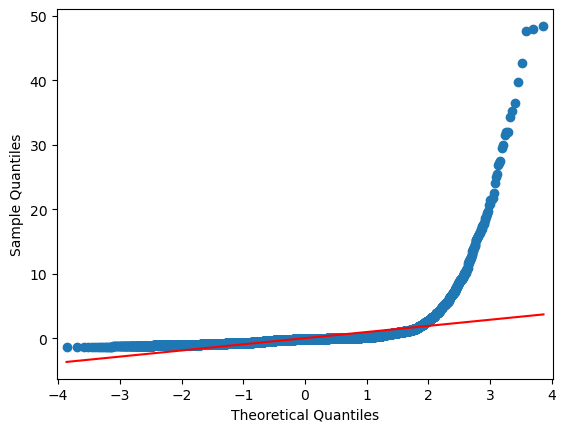

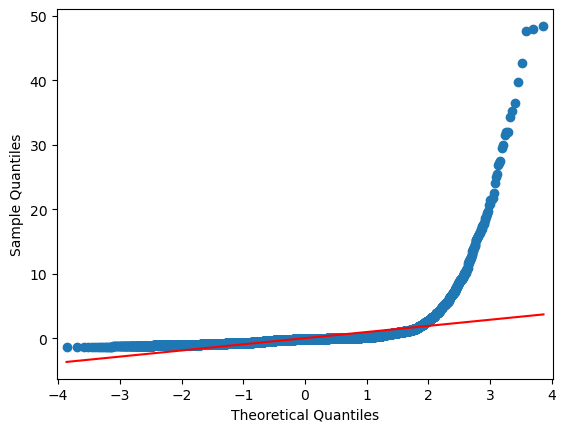

In [41]:
from statsmodels import graphics
graphics.gofplots.qqplot(poisson_results.resid_pearson, line='r')

In [42]:
poisson_results.predict(Xtest)

10726    1.042447
12098    1.483193
7949     0.832831
14150    1.113766
18565    1.124350
           ...   
19807    1.042447
8079     1.249127
9302     1.041991
6523     2.348573
20477    1.054095
Length: 4477, dtype: float64

In [43]:
np.sqrt(np.mean(np.square(poisson_results.predict(Xtest) - np.array(ytest['bird_count']))))

2.9382610848417663